In [1]:
import cv2 
import numpy as np
import matplotlib.pylab as plt

def show(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")

# Padding Concept and Add Padding for Image

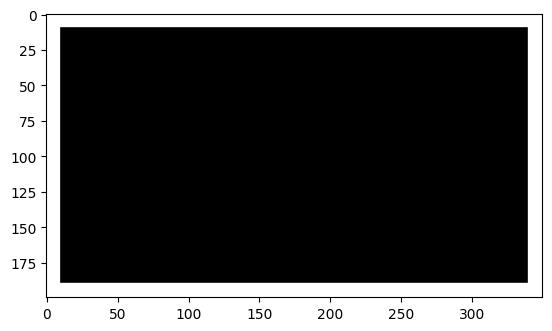

In [13]:
img = np.zeros((200,350),dtype = np.uint8)
height = img.shape[0]
width = img.shape[1]
show(img)

# add padding top 
img[0:10 ,:]   = 255

# add padding bottom 
img[height-10:height, : ]   = 255

# add padding left 
img[:, 0: 10]   = 255

# add padding right
img[:, width-10: width]   = 255
show(img)

# Kernel and Struct Element

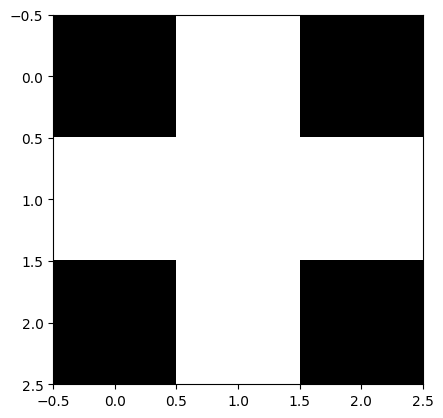

In [19]:
kernel = np.array([
    [0,255,0],
    [255,255,255],
    [0,255,0]
],dtype = np.uint8)
show(kernel)

# Miss, Fit, Hit Concept

# Morphological
* Erosion
* Dilation
* Opening
* Closing

# Add Padding

In [40]:
kernel_size = 7
pading = kernel_size //2 
pading

3

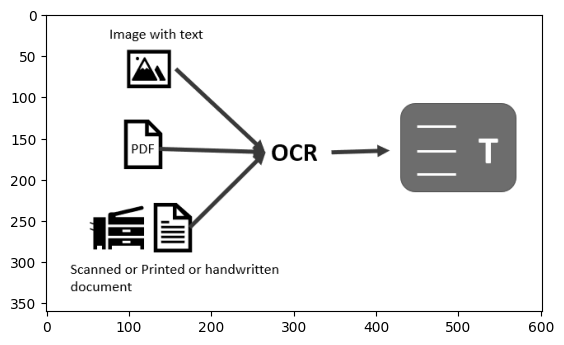

In [3]:
img = cv2.imread("images/ocr.png",0)
show(img)

In [38]:
print(img.shape)

(360, 602)


In [7]:
def add_padding(img, kernel_size):
    pading = kernel_size //2
    
    width  = img.shape[1]
    height  = img.shape[0]
    
    new_height  = int(height+2 *pading )
    new_width  = int(width+2 *pading )
    
    padding_space = np.zeros((new_height,new_width),dtype = np.uint8)

    padding_space[pading:new_height - pading , pading: new_width-pading] = img
    
    return padding_space

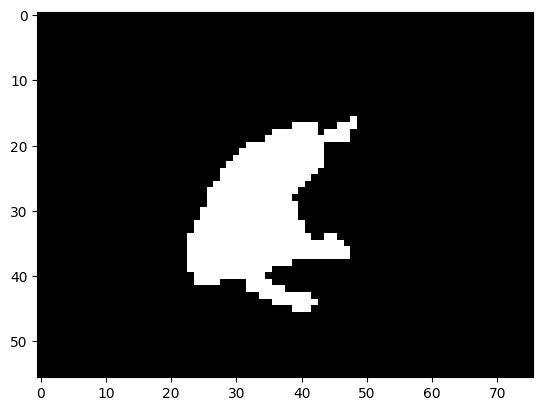

In [8]:
padding_space = add_padding(img, 7)
show(padding_space)

# Dilation 

In [62]:
def img_dilation(img,kernel_size):
    # add padding image
    img_padding = add_padding(img,kernel_size)
    
    padding = kernel_size//2
    #get width ,height
    height = img.shape[0]
    width = img.shape[1]
    
    # new width, new height
    new_height =int( height+ 2*padding)
    new_width = int(width+ 2*padding)
    
    dilation_space =np.zeros((height,width),dtype =np.uint8)
        
    for y in range(new_height - kernel_size):
        for x in range(new_width - kernel_size ):
            
            for m in range(1,kernel_size+1): # for height
                for n in range(1,kernel_size+1): # for width
                    if img_padding[y+m,x+n] == 255:
                        dilation_space[y,x] = 255
                        break
                
    return dilation_space
    

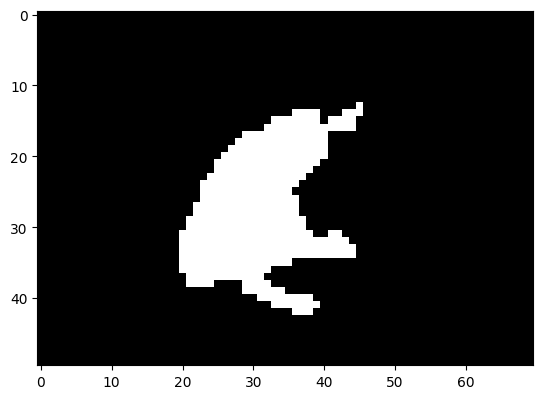

In [31]:
img = cv2.imread("images/mor.png",0)
show(img)

(50, 70)

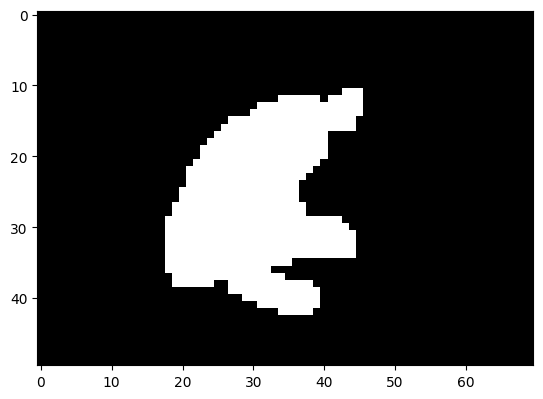

In [42]:
dilation_space = img_dilation(img,3)
show(dilation_space)
dilation_space.shape

# OpenCV


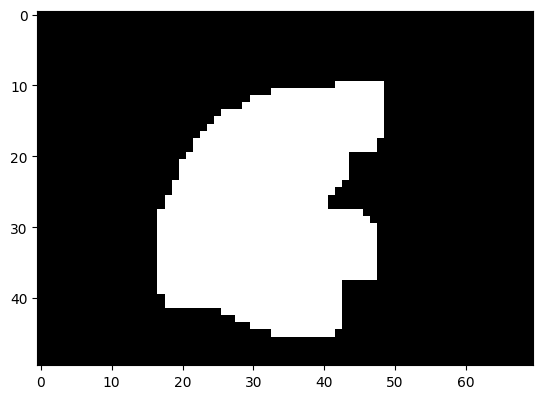

In [46]:
kenrel = np.ones((3,3), dtype = np.uint8)
dilationed  = cv2.dilate(img,kenrel,iterations = 3)
show(dilationed)

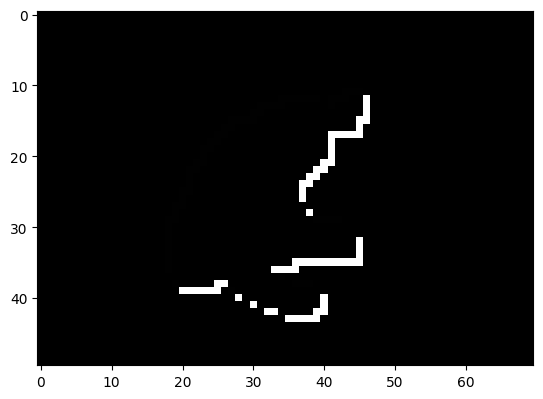

In [44]:
diff  = dilationed - dilation_space
show(diff)

# Erosion

In [65]:
def img_erosion (img, kernel_size):
    """_summary_

    Args:
        is_erosion: _description_
        is_erosion == True: fit 
        is_erosion == False: miss, hit 
    """
    # add padding 
    img_padding = add_padding(img,kernel_size)
    
    # calc padding
    padding = kernel_size // 2
    
    # width, height
    width =img.shape[1]
    height =img.shape[0]
    # new_width, new_height
    new_width = width + 2*padding 
    new_height = height + 2*padding 
    
    # create erosion_space 
    
    erosion_space = np.zeros((height,width), dtype = np.uint8)
    
    for y in range(height -kernel_size):
        for x in range(width -kernel_size):
            is_erosion = True
            # for pixel in kernel
            
            for m in range(1, kernel_size+1):# for height 
                for n in range(1, kernel_size+1): # for width 
                    if img_padding[y+m, x+n] !=255:
                        is_erosion = False
                        break
                    
                if is_erosion ==False:
                    break
            
            if is_erosion:
                erosion_space [y,x] = 255
            
    return   erosion_space

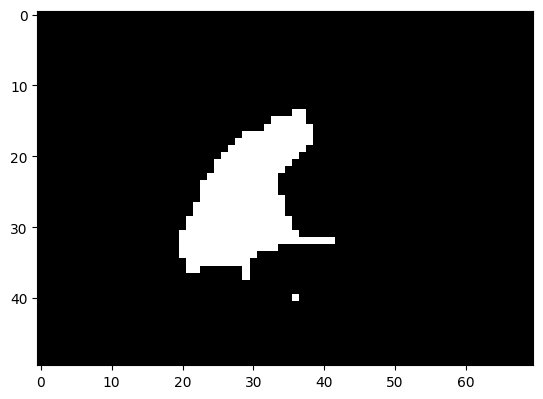

In [56]:
erosion_space = img_erosion(img,3)
show(erosion_space)

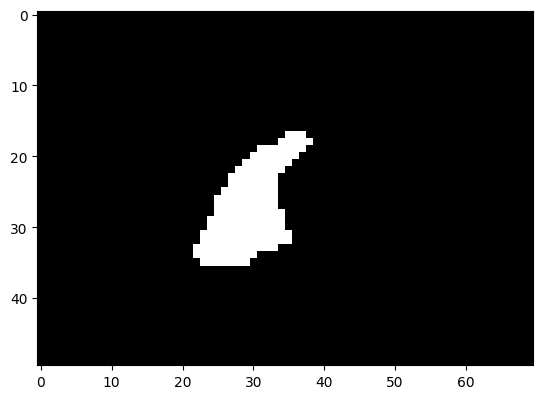

In [60]:
kenrel = np.ones((3,3), dtype = np.uint8)
erosioned  = cv2.erode(img,kenrel,iterations = 2)
show(erosioned)

# Opening

* Erosion -> Dilation

In [66]:
def opening(img, kernel_size):
    erosioned = img_erosion(img, kernel_size)
    dialationed = img_dilation(erosioned,kernel_size)
    
    return dialationed

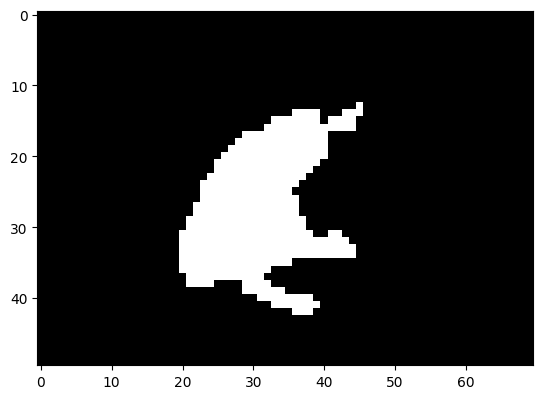

In [69]:
show(img)

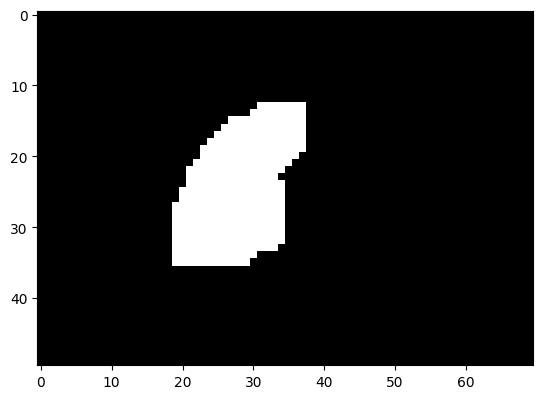

In [70]:
opened = opening(img, 7)
show(opened)

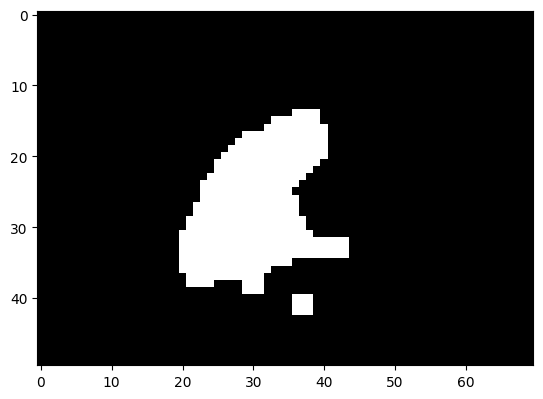

In [72]:
kenrel = np.ones((3,3), dtype = np.uint8)
erosioned  = cv2.morphologyEx(img, cv2.MORPH_OPEN, kenrel)
show(erosioned)

# Closing
* Dilation -> Erosion

In [75]:
def closing(img, kernel_size):
    
    dialationed = img_dilation(img,kernel_size)
    erosioned = img_erosion(dialationed, kernel_size)
    
    return erosioned

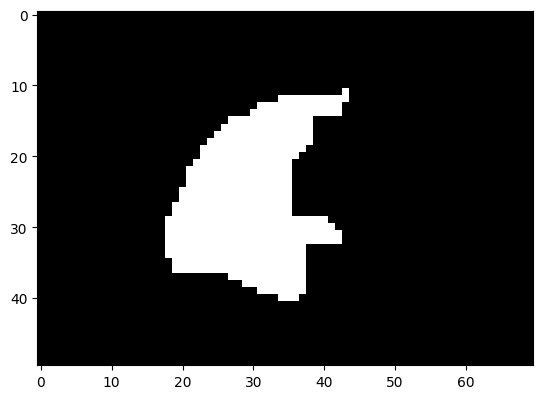

In [78]:
closed = closing(img, 7)
show(closed)

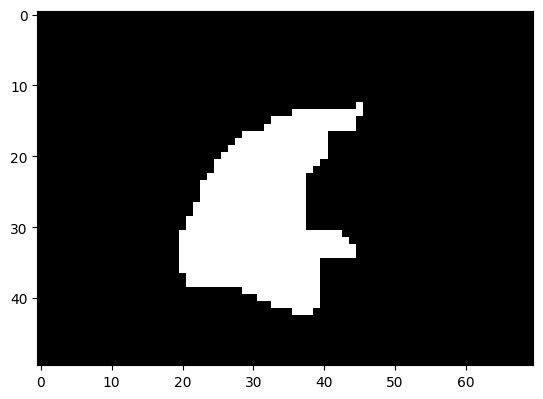

In [81]:
kenrel = np.ones((7,7), dtype = np.uint8)
closed  = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kenrel)
show(closed)

# Specially Struct Element

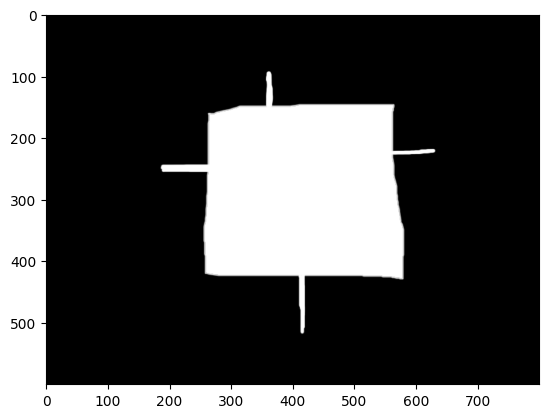

In [2]:
img = cv2.imread("images/shape1.png",0)
show(img)

In [ ]:
kenrel = np.ones((5,5), dtype = np.uint8)
ero = img_erosion(img, 5)
ero = img_erosion(ero, 5)
ero = img_erosion(ero, 5)
show(ero)

(1, 13)


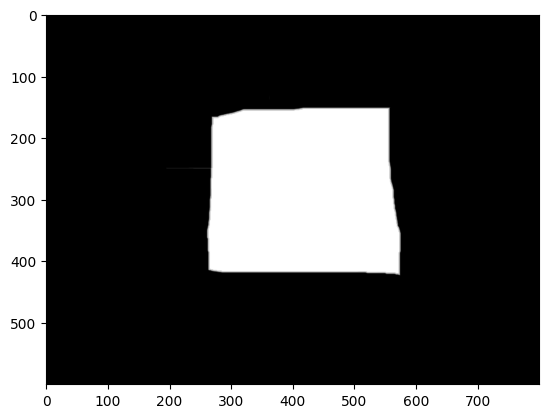

In [10]:
kenrel = np.ones((1,13), dtype = np.uint8)
print(kenrel.shape)
ero  = cv2.erode(img,kenrel,iterations = 1)
ero  = cv2.erode(ero,np.ones((13,1), dtype = np.uint8),iterations = 1)
show(ero)

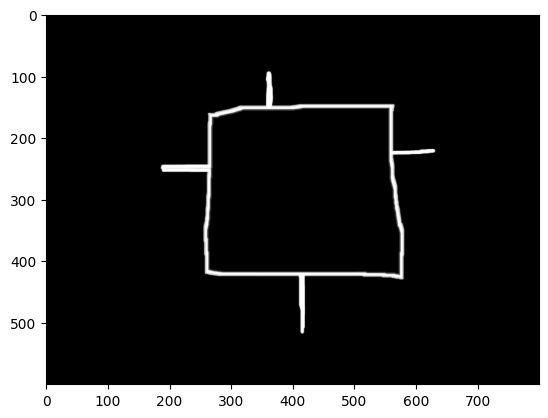

In [14]:
show(img-ero)

(11, 1)


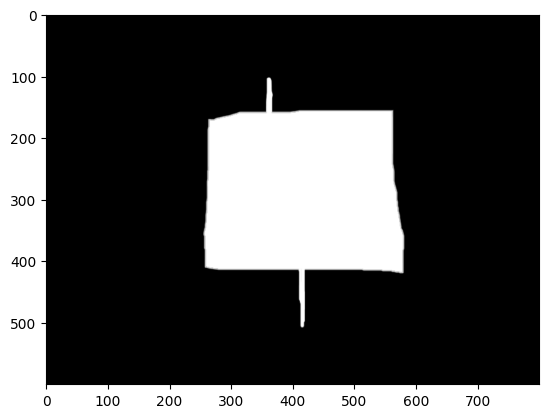

In [5]:
kenrel = np.ones((11,1), dtype = np.uint8)
print(kenrel.shape)
ero  = cv2.erode(img,kenrel,iterations = 2)
show(ero)

# Create Struct Element 

## Rectangle Kernel

In [18]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize = (5,5))
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

## Cross Kernel

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize = (5,5))
kernel

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

## Elipse Kernel (Circle if kernel_width = kernel_height)

In [22]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (5,5))
kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)